# FINAL EDA - 3_ACT_DESAGREGADO

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

   
ruta_archivos = 'C:/Users/Usuario/Documents/EDA_Omnivida/'

## 1. Módulo de Interés

In [2]:
modulo = 'acd' # Este equivale al 'prefi' del diccionario. El diccionario está en: 1_data_transformation/generic_functions.py
ad_marca = 'adeherencia_0'
ids = ['id','year','month',ad_marca]

## 2. Carga de Datos

In [3]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv')
base.head()

,id,year,month,adeherencia_0,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,far_cau_otra_sum_6,...,hab_alcohol_avg_12,hab_cigarrillo_avg_12,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto
0,500547,2016,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN
1,500547,2019,3,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
3,500547,2019,12,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
4,500547,2020,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN


In [4]:
variables = [i for i in base.columns if i.startswith( modulo + '_')]
df = base[ids + variables]
df.head()

,id,year,month,adeherencia_0,acd_cont_asma_avg_6,acd_ef_act_usu_avg_6,acd_ef_sueno_avg_6,acd_falta_aire_avg_6,acd_uso_inhal_avg_6,acd_cont_asma_avg_12,acd_ef_act_usu_avg_12,acd_ef_sueno_avg_12,acd_falta_aire_avg_12,acd_uso_inhal_avg_12
0,500547,2016,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500547,2019,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500547,2020,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3663, 14)

## 3. Análisis
### 3.1. Completitud

In [6]:
# Se calcula el número de nulls por fila, y se descartan los registros con todo en null
df['nulls'] = df.isnull().sum(axis = 1)
todo_null = df.shape[1] - 5    #id, month, year, nuls, adeherencia_0
df = df[df['nulls'] < todo_null ].copy()
print("La base se reduce a "+ str(df.shape[0]) + " de " + str(base.shape[0]) +
      " registros. Que corresponde a un " + str(round(df.shape[0]/base.shape[0]*100, 2)) + "%.")
df.head()

La base se reduce a 1425 de 3663 registros. Que corresponde a un 38.9%.


,id,year,month,adeherencia_0,acd_cont_asma_avg_6,acd_ef_act_usu_avg_6,acd_ef_sueno_avg_6,acd_falta_aire_avg_6,acd_uso_inhal_avg_6,acd_cont_asma_avg_12,acd_ef_act_usu_avg_12,acd_ef_sueno_avg_12,acd_falta_aire_avg_12,acd_uso_inhal_avg_12,nulls
10,502989,2017,3,1,1.0,2.0,2.0,4.0,3.0,1.0,2.0,2.0,4.0,3.0,0
11,502989,2017,7,1,1.0,2.0,2.0,4.0,3.0,1.0,2.0,2.0,4.0,3.0,0
12,502989,2017,8,1,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,4.0,3.0,5
13,502989,2018,10,0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,0
14,502989,2019,2,1,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,0


### 3.2 Análisis Temporal

In [7]:
df.columns

Index(['id', 'year', 'month', 'adeherencia_0', 'acd_cont_asma_avg_6',
       'acd_ef_act_usu_avg_6', 'acd_ef_sueno_avg_6', 'acd_falta_aire_avg_6',
       'acd_uso_inhal_avg_6', 'acd_cont_asma_avg_12', 'acd_ef_act_usu_avg_12',
       'acd_ef_sueno_avg_12', 'acd_falta_aire_avg_12', 'acd_uso_inhal_avg_12',
       'nulls'],
      dtype='object')

In [8]:
# se transforma la fecha para ser de tipo datetime
df['day'] = 1
df['fecha'] = pd.to_datetime(df[['year','month','day']])
df['fecha'] = df['fecha'].apply(lambda x: x.strftime('%Y%m'))

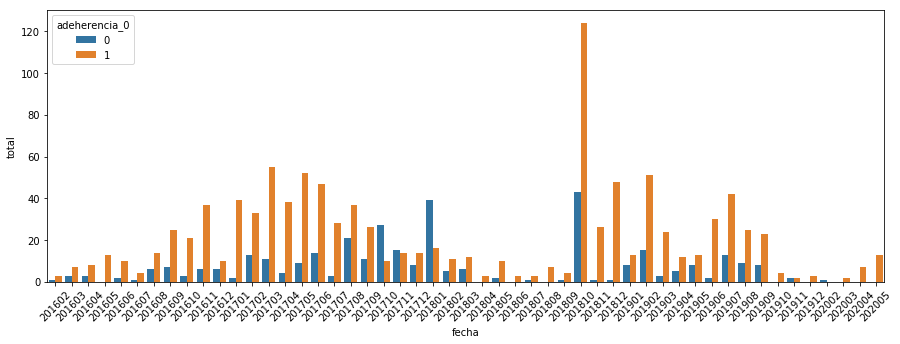

In [9]:
# adeherencia_0: 
df_g = df.groupby(['fecha','adeherencia_0'])['id'].count().reset_index(name='total')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="fecha", y="total", hue="adeherencia_0", data=df_g)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Se encuentran registros a lo largo de toda la historia. Desde 201603 hasta 202005. Hay un pico de no-adherencia en 201712. 

### 3.3 Correlaciones

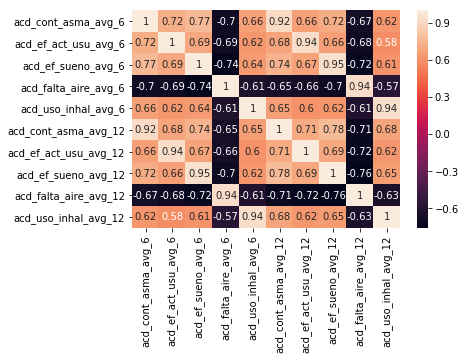

In [11]:
corrMatrix = df[variables].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
df.columns

Index(['id', 'year', 'month', 'adeherencia_0', 'acd_cont_asma_avg_6',
       'acd_ef_act_usu_avg_6', 'acd_ef_sueno_avg_6', 'acd_falta_aire_avg_6',
       'acd_uso_inhal_avg_6', 'acd_cont_asma_avg_12', 'acd_ef_act_usu_avg_12',
       'acd_ef_sueno_avg_12', 'acd_falta_aire_avg_12', 'acd_uso_inhal_avg_12',
       'nulls', 'day', 'fecha'],
      dtype='object')

Hay correlaciones altas entre variables a los 6 y 12 meses.

### 3.4 Dispersión

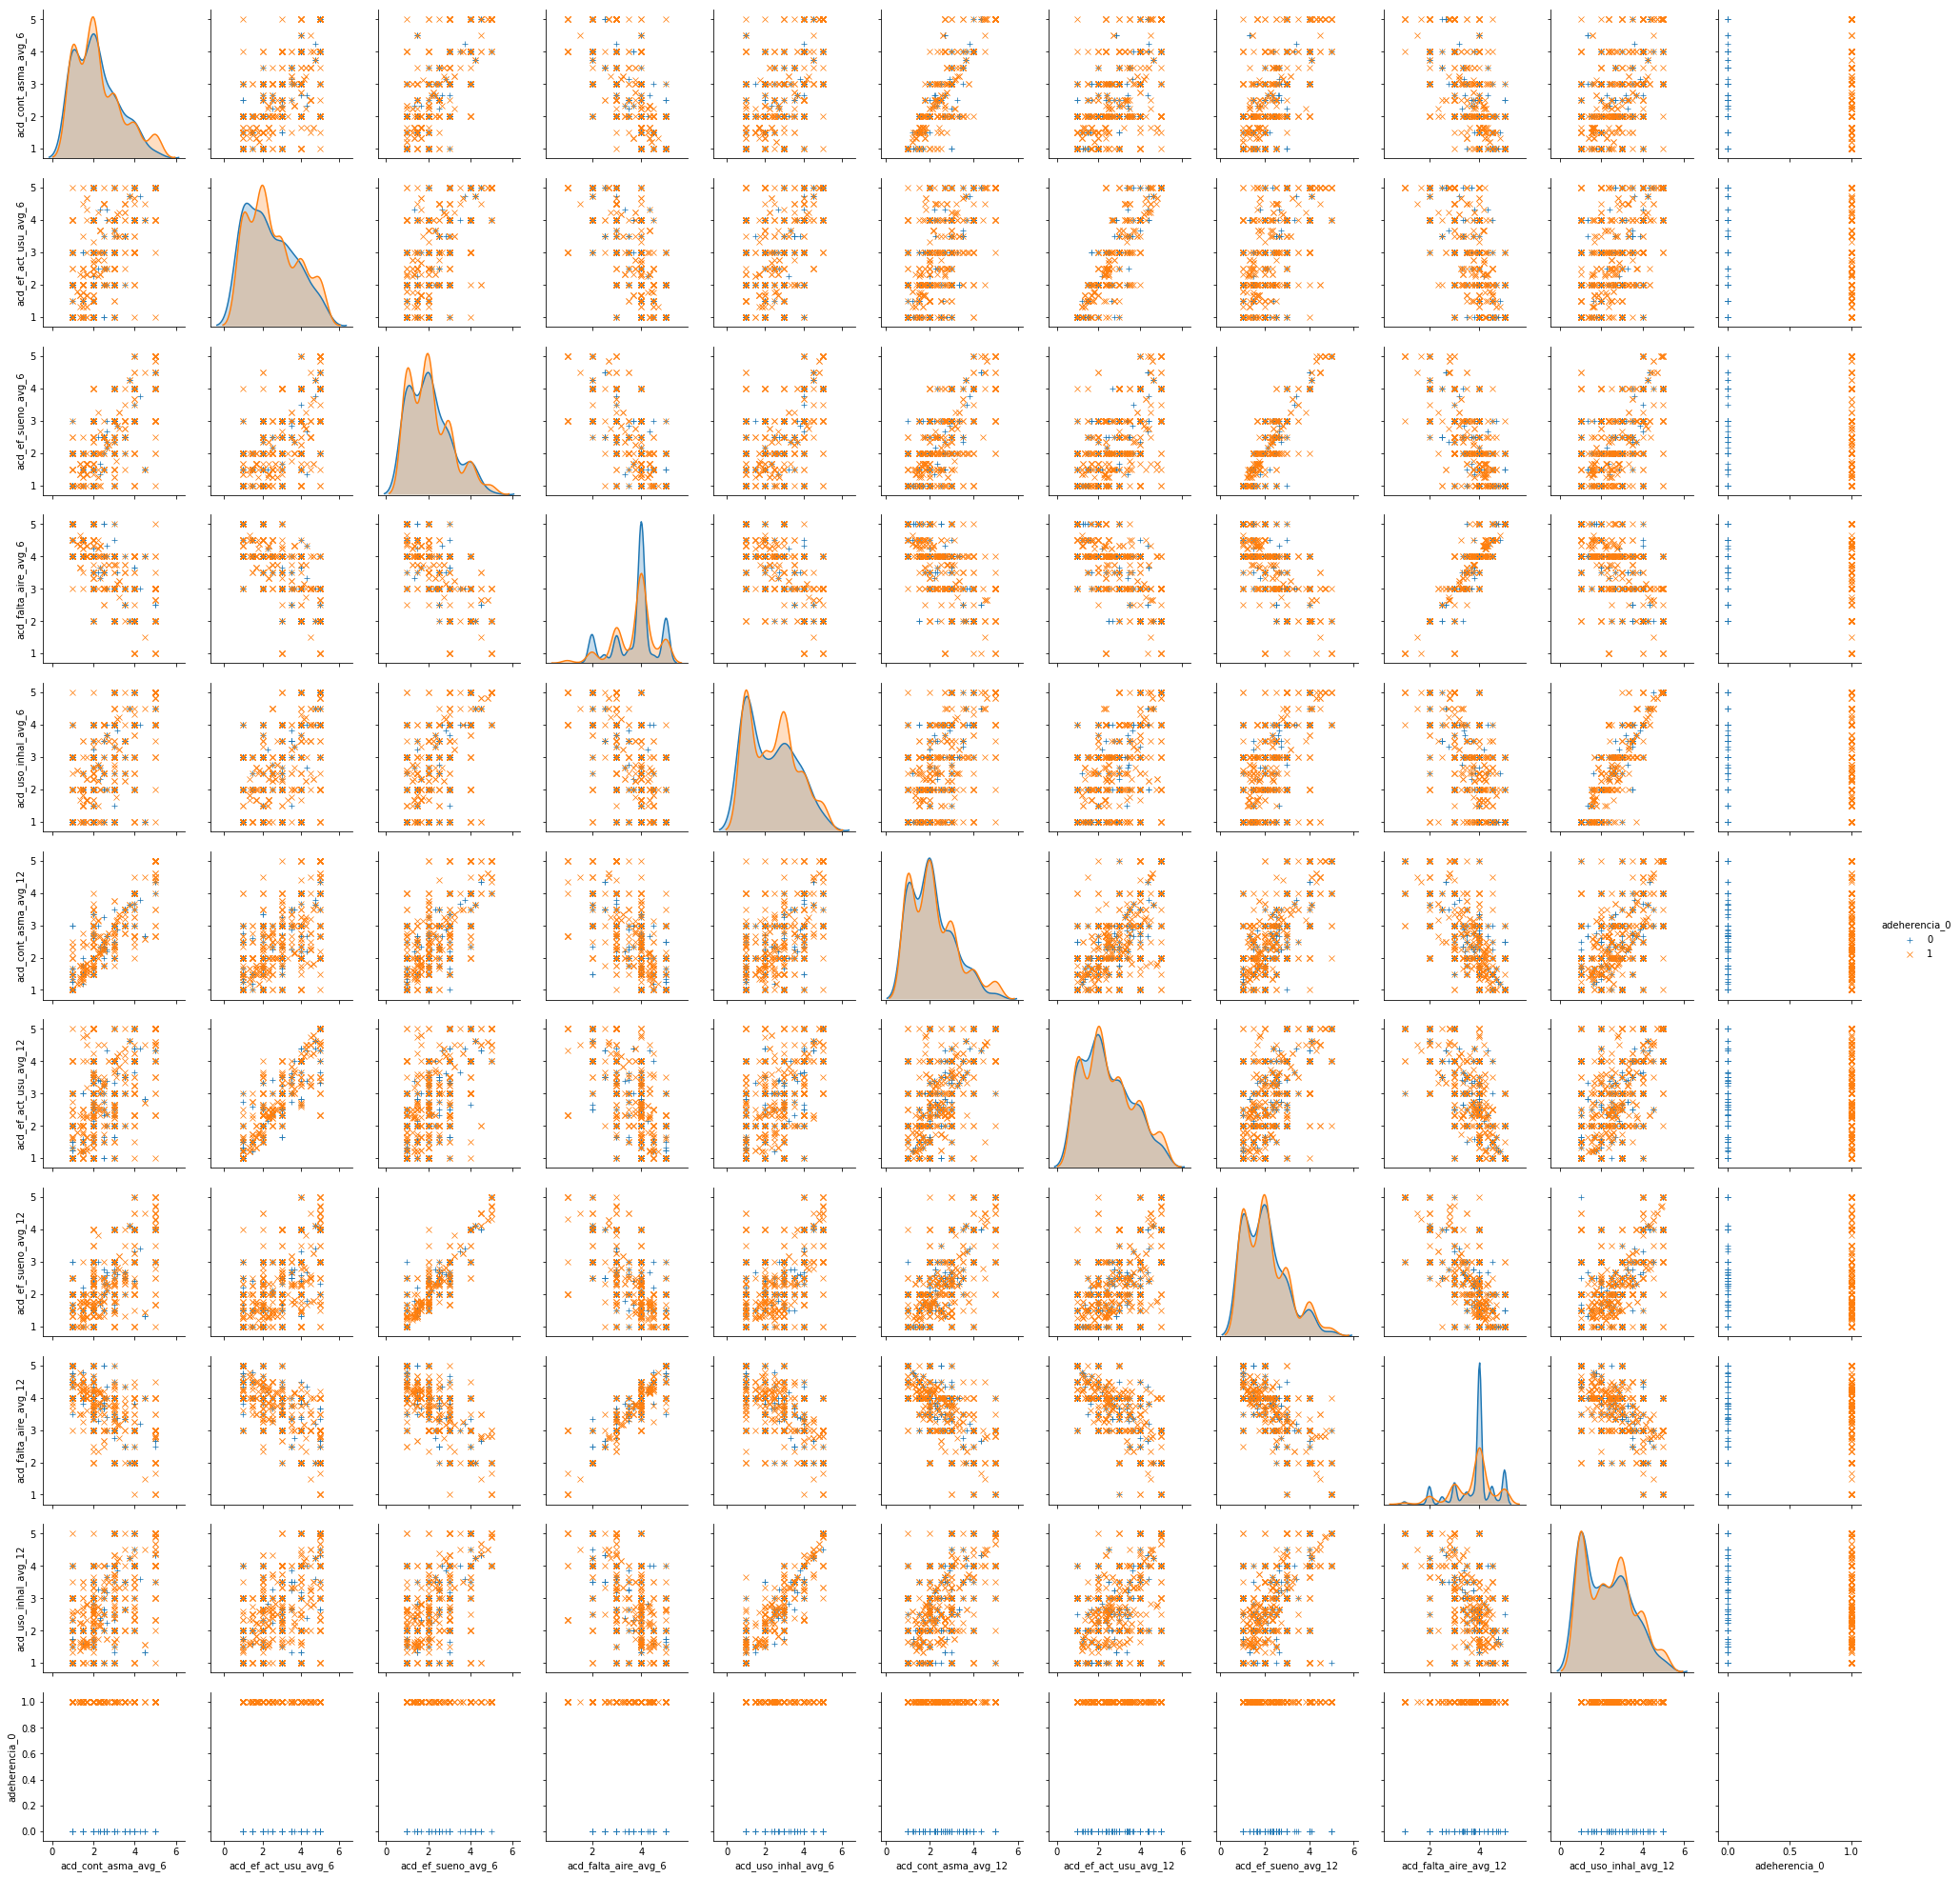

In [20]:
g = sns.pairplot(df[variables + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

Las distribuciones entre adherente y no adherente son muy similares. No se observan patrones diferenciales entre adherencia y no adherencia.

### 3.5 Boxplot Temporal

Dado que sólo una variable fue rescatada por el análisis y no se ve mayor diferencia con las demás variables. Se revisar el boxplot para la variable acd_ef_sueno_avg_12 (Valor numerico (1-5) del control de asma del paciente en el mes , ¿CUAN SATISFECHO ESTA CON SU SUEÑO?)

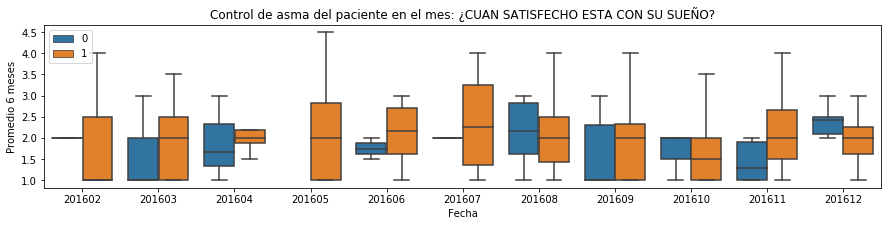

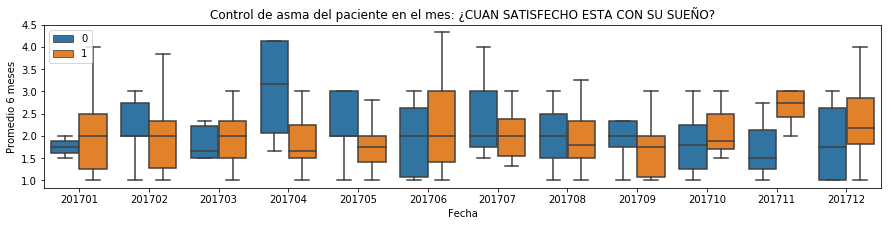

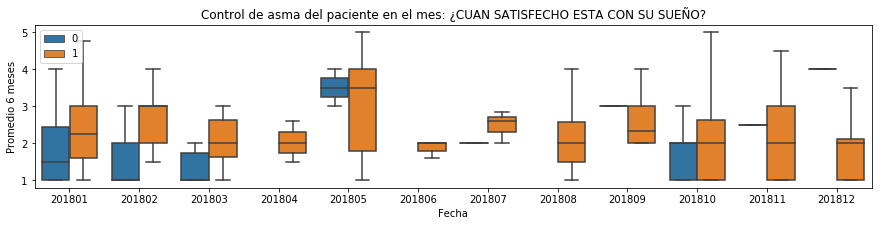

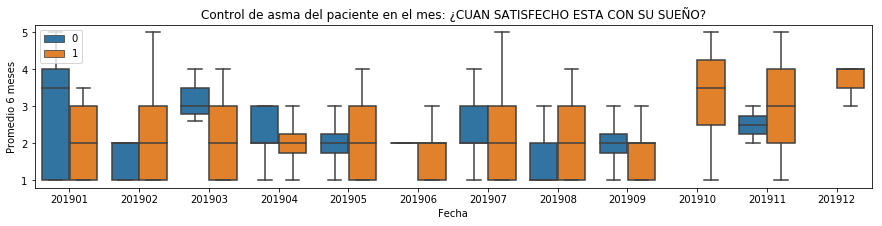

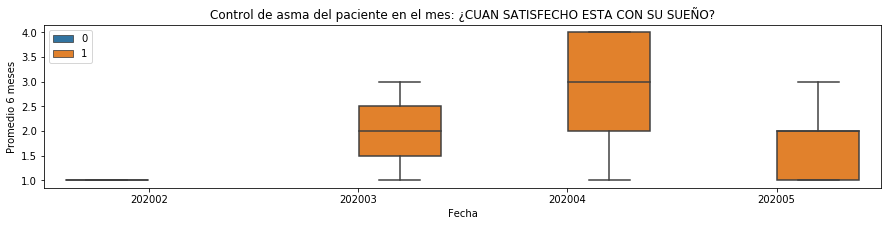

In [21]:
years = [2016,2017,2018,2019,2020]

for y in years :
    fig, ax = plt.subplots(figsize=(15, 3))
    m = sns.boxplot(
        x="fecha",
        y="acd_ef_sueno_avg_12",
        hue="adeherencia_0",
        data=df[df['year']==y],
        orient="vertical",
        showfliers=False,
    )

    # Format plot
    plt.legend(loc="upper left")
    plt.title("Control de asma del paciente en el mes: ¿CUAN SATISFECHO ESTA CON SU SUEÑO?")
    #plt.xticks(rotation=45)
    plt.xlabel("Fecha")
    _ = plt.ylabel("Promedio 6 meses")

No adherentes cuentan con menos datos que adherentes en relación a satisfacción del sueño.

In [25]:
df.describe()

,id,year,month,adeherencia_0,acd_cont_asma_avg_6,acd_ef_act_usu_avg_6,acd_ef_sueno_avg_6,acd_falta_aire_avg_6,acd_uso_inhal_avg_6,acd_cont_asma_avg_12,acd_ef_act_usu_avg_12,acd_ef_sueno_avg_12,acd_falta_aire_avg_12,acd_uso_inhal_avg_12,nulls,day
count,1.425000e+03,1425.000000,1425.000000,1425.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.0
mean,1.231660e+06,2017.614035,6.607018,0.755088,2.230398,2.531204,2.110612,3.772255,2.404142,2.158749,2.489172,2.073466,3.785294,2.359080,1.484211,1.0
std,4.117367e+05,1.021441,3.467134,0.430186,1.118026,1.271487,1.007322,0.832401,1.242728,1.043206,1.191678,0.974681,0.813553,1.181171,2.285134,0.0
min,5.029890e+05,2016.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0
25%,8.838450e+05,2017.000000,3.000000,1.000000,1.000000,1.500000,1.000000,3.000000,1.000000,1.000000,1.500000,1.000000,3.333333,1.000000,0.000000,1.0
50%,1.233893e+06,2017.000000,7.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.333333,2.000000,2.000000,2.000000,4.000000,2.250000,0.000000,1.0
75%,1.557932e+06,2018.000000,10.000000,1.000000,3.000000,3.500000,3.000000,4.000000,3.000000,3.000000,3.250000,2.666667,4.000000,3.000000,5.000000,1.0
max,1.999629e+06,2020.000000,12.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0


### 3.6 Análisis por Paciente

In [15]:
df_gi = df.groupby('id')['year'].count().reset_index(name = 'cuenta')

print("Estas variables están presentes para " + str(df_gi.shape[0]) + " pacientes únicos. Los pacientes más frecuentes en el tiempo son:")

df_gi.sort_values('cuenta', ascending = False).head(10)

Estas variables están presentes para 331 pacientes únicos. Los pacientes más frecuentes en el tiempo son:


,id,cuenta
201,1437443,23
93,916510,22
153,1196034,22
213,1463545,19
298,1828862,18
234,1536265,17
104,974281,16
284,1764814,16
60,747471,15
200,1427481,15


El siguiente conteo revisa de forma independiente los conteos por marca de adherencia.

In [16]:
df_gi = df.groupby(['id','adeherencia_0'])['year'].count().reset_index(name = 'cuenta')

df_gip = df_gi.pivot("id", "adeherencia_0", "cuenta").reset_index()
df_gip.fillna(0, inplace = True )
df_gip['total'] = df_gip[0] + df_gip[1]
df_gip.sort_values('total', ascending = False).head(15)

adeherencia_0,id,0,1,total
201,1437443,4.0,19.0,23.0
93,916510,8.0,14.0,22.0
153,1196034,4.0,18.0,22.0
213,1463545,3.0,16.0,19.0
298,1828862,10.0,8.0,18.0
234,1536265,2.0,15.0,17.0
104,974281,2.0,14.0,16.0
284,1764814,2.0,14.0,16.0
60,747471,5.0,10.0,15.0
200,1427481,1.0,14.0,15.0
